In [16]:
import pandas as pd
import numpy as np
from Functions import *

In [17]:
df_data  = pd.read_csv("./results/EME_res_w_RDL.csv")

In [18]:
from scipy.signal import find_peaks
import numpy as np

x           =  np.array(df_data.iloc[:,2])
peaks, _    = find_peaks(x)
print("峰值索引:", peaks)  # 输出: [2, 5, 7]
print("峰值值:", x[peaks])  # 输出: [7, 6, 4]

峰值索引: [218 693]
峰值值: [0.99922162 0.99171782]


In [19]:
len_RDL_arr = np.array(df_data.columns[1:]).astype(np.float32)
len_prop_arr = np.array(df_data['len_prop']).astype(np.float32)

In [20]:
legend_idx_arr = [1,3,5,7]
max_coupling_len_idx = 451
legend_arr = [ r"$L_{Taper}=$"+r"{:.0f}$\mu m$".format(len_RDL_arr[legend_idx - 1]) for legend_idx in legend_idx_arr]

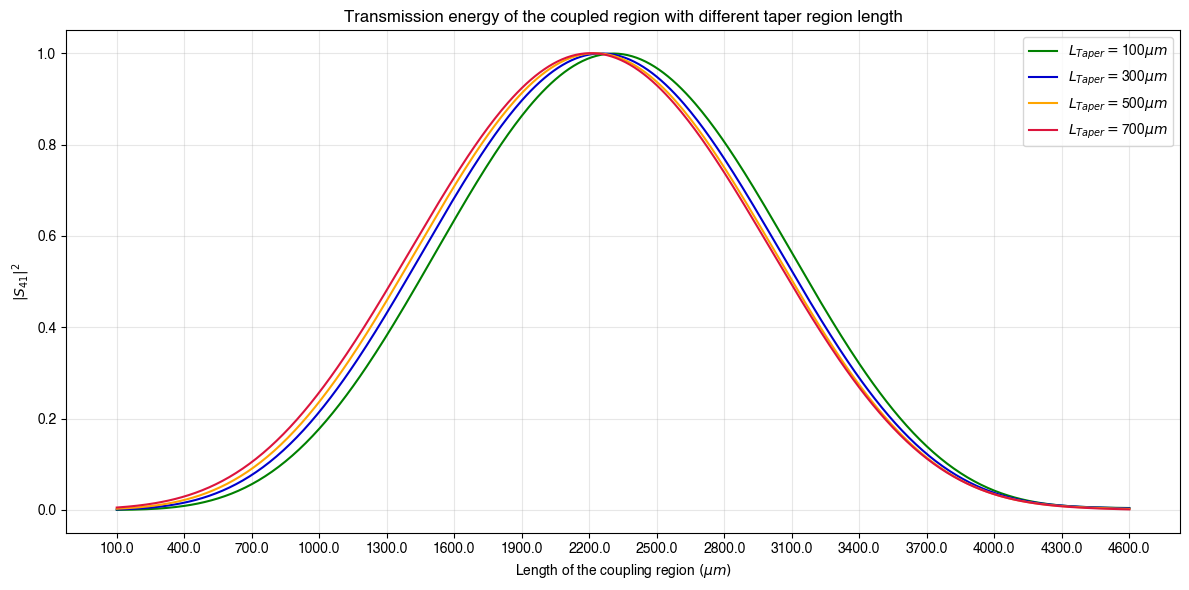

In [21]:
len_prop_arr_label = np.linspace(np.min(len_prop_arr[:max_coupling_len_idx]),np.max(len_prop_arr[:max_coupling_len_idx]),16)
colors_list = ['green','mediumblue','orange','crimson','lightskyblue','steelblue','black']*2
param_dict = {  "Y_legends"     : legend_arr,
                "X_label"       : r"Length of the coupling region $(\mu m)$",
                "Y_label"       : r"$|S_{41}|^2$",
                "title"         : r"Transmission energy of the coupled region with different taper region length",
                "figsize"       : (12,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                "xticks"        : len_prop_arr_label,
                "xtickslabel"   : len_prop_arr_label,
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}

Plot_curve((np.c_[len_prop_arr[:max_coupling_len_idx],
                  np.array(df_data.iloc[:max_coupling_len_idx,1]),
                  np.array(df_data.iloc[:max_coupling_len_idx,3]),
                  np.array(df_data.iloc[:max_coupling_len_idx,5]),
                  np.array(df_data.iloc[:max_coupling_len_idx,7])],),**param_dict)

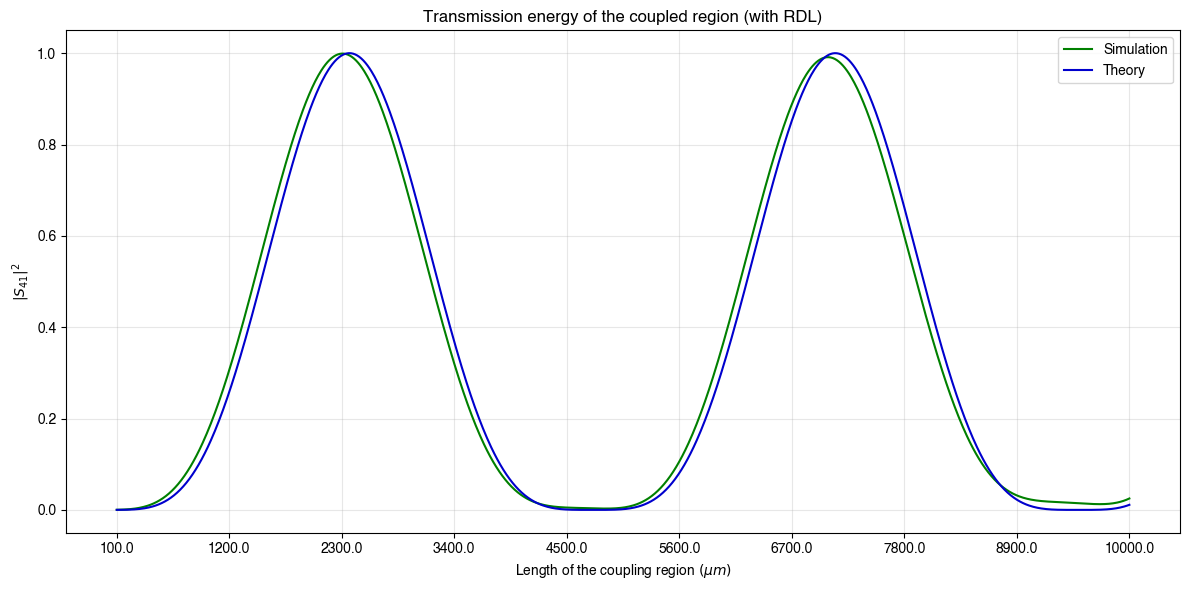

In [30]:
len_prop_arr_label = np.linspace(np.min(len_prop_arr[:]),np.max(len_prop_arr[:]),10)
param_dict = {  "Y_legends"     : ["Simulation","Theory",""],
                "X_label"       : r"Length of the coupling region $(\mu m)$",
                "Y_label"       : r"$|S_{41}|^2$",
                "title"         : r"Transmission energy of the coupled region (with RDL)",
                "figsize"       : (12,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                "xticks"        : len_prop_arr_label,
                "xtickslabel"   : len_prop_arr_label,
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}
Plot_curve((np.c_[len_prop_arr, np.array(df_data.iloc[:,1]), np.abs(np.sin(np.pi/4750*len_prop_arr)**4)],),**param_dict)

In [23]:
idx = np.argmin(np.abs(np.array(df_data.iloc[:200,1:])-0.564422),axis=0)
len_prop_arr[idx]+len_RDL_arr


array([1620., 1690., 1760., 1840., 1930., 2020., 2100.], dtype=float32)

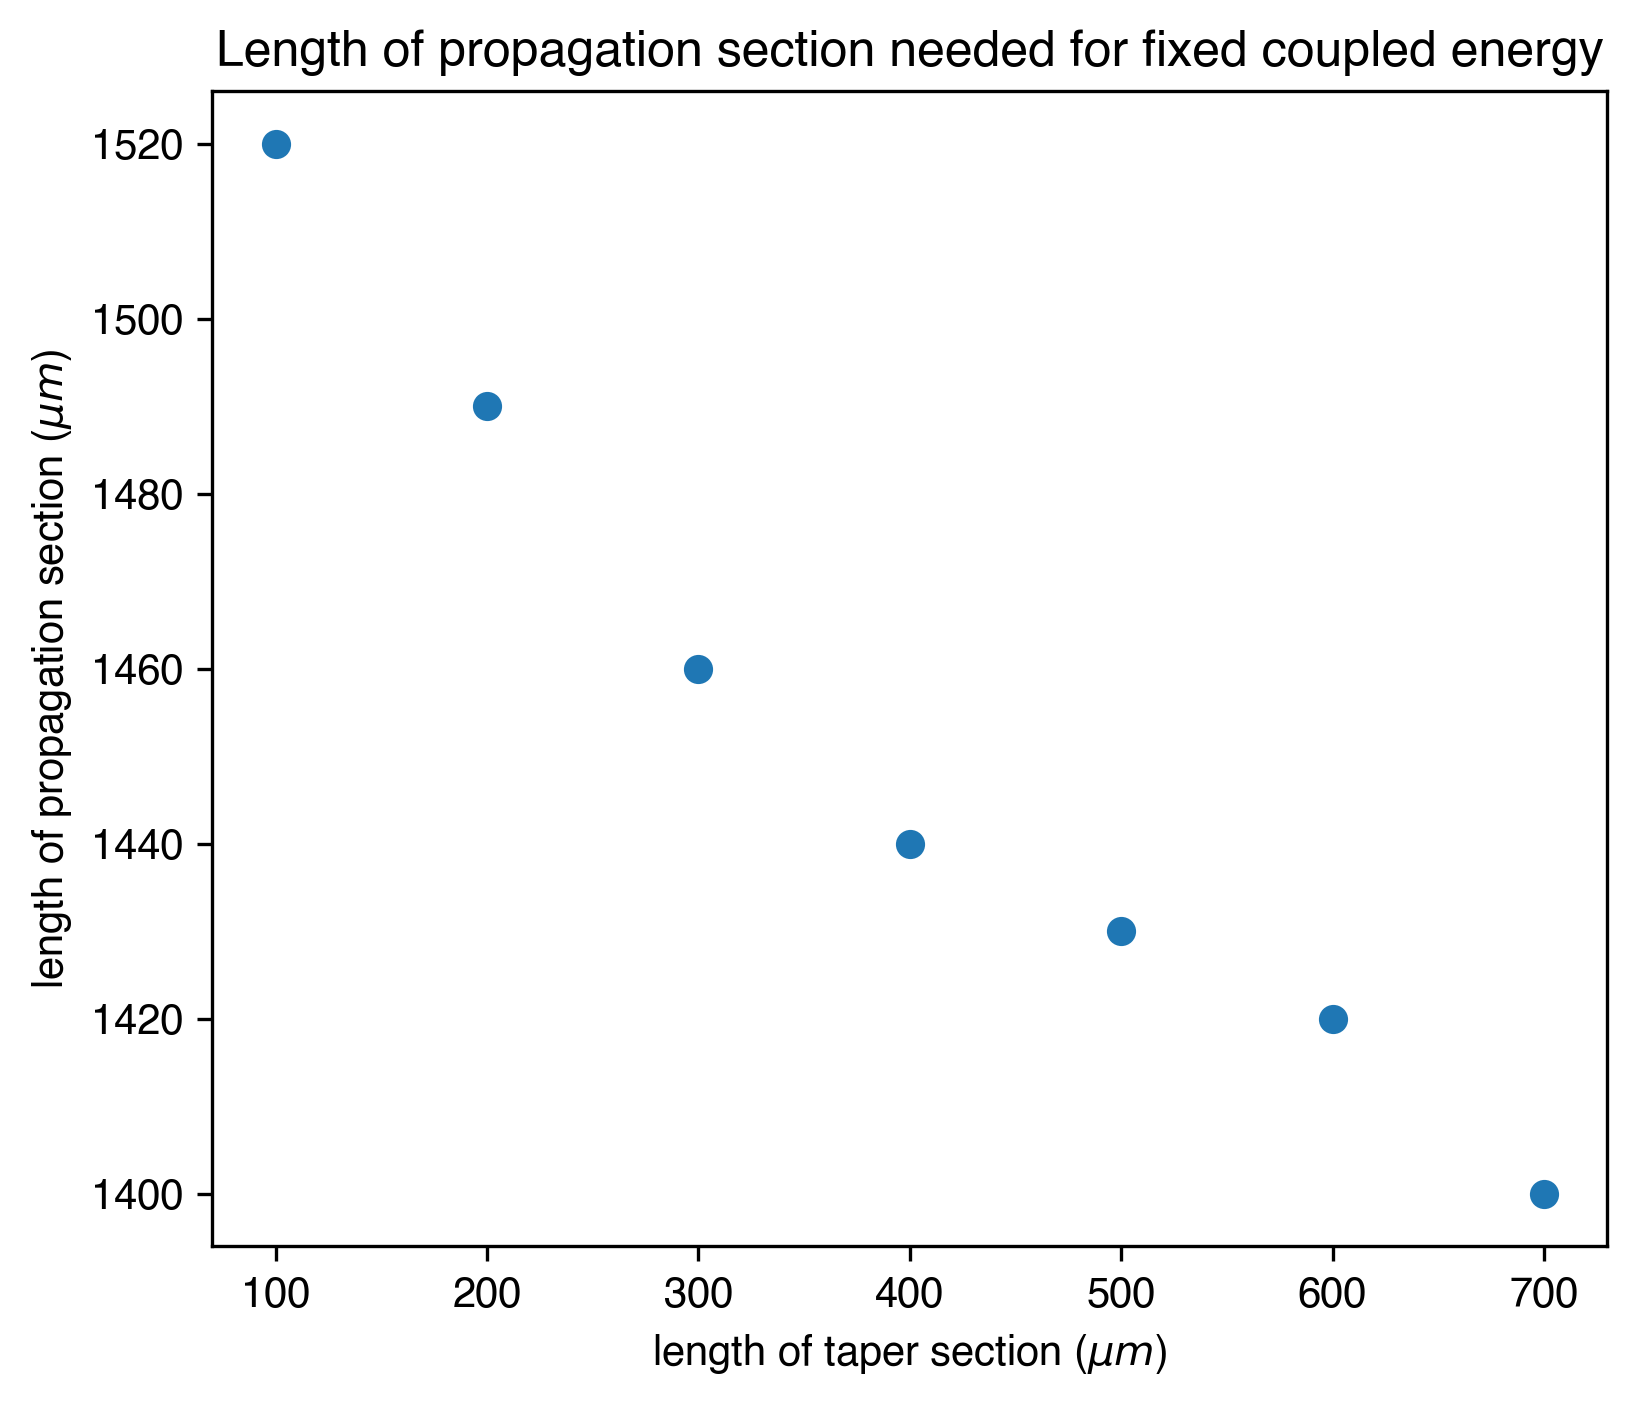

In [24]:
plt.figure(figsize=(6,5),dpi=300)
plt.scatter(len_RDL_arr,len_prop_arr[idx])
plt.title("Length of propagation section needed for fixed coupled energy")
plt.xlabel(r"length of taper section ($\mu m$)")
plt.ylabel(r"length of propagation section ($\mu m$)")
plt.savefig("./results/Length of propagation section needed for fixed coupled energy.jpg")

In [25]:
df_data_no_RDL  = pd.read_csv("./results/EME_res_wO_RDL.csv")
df_data_no_RDL

,len_prop,100,200,300,400,500,600,700
0,100.0,0.000001,0.000003,0.000006,0.000011,0.000016,0.000022,0.000029
1,105.0,0.000001,0.000003,0.000006,0.000011,0.000016,0.000022,0.000029
2,110.0,0.000001,0.000003,0.000007,0.000011,0.000016,0.000022,0.000030
3,115.0,0.000001,0.000003,0.000007,0.000011,0.000016,0.000022,0.000030
4,120.0,0.000001,0.000004,0.000007,0.000011,0.000016,0.000023,0.000030
...,...,...,...,...,...,...,...,...
676,3480.0,0.000175,0.000194,0.000215,0.000237,0.000259,0.000283,0.000308
677,3485.0,0.000175,0.000195,0.000216,0.000237,0.000260,0.000283,0.000308
678,3490.0,0.000176,0.000195,0.000216,0.000238,0.000260,0.000284,0.000309
679,3495.0,0.000176,0.000196,0.000217,0.000238,0.000261,0.000285,0.000309


In [26]:
len_RDL_arr_no_RDL = np.array(df_data_no_RDL.columns[1:]).astype(np.float32)
len_prop_arr_no_RDL = np.array(df_data_no_RDL['len_prop']).astype(np.float32)

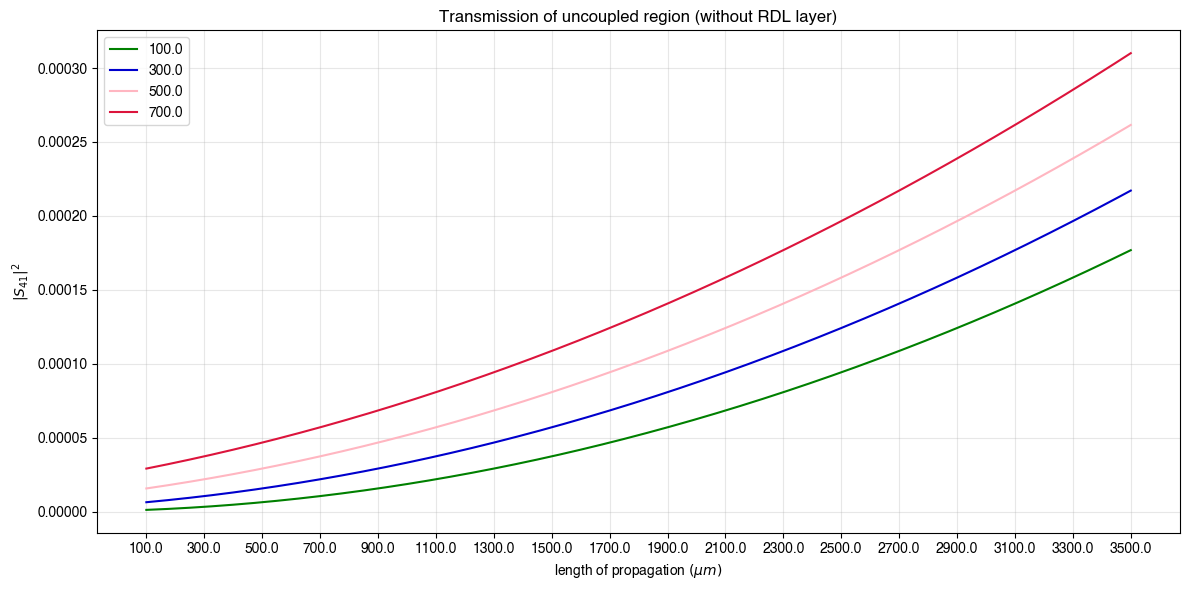

In [27]:
len_prop_arr_label = np.linspace(np.min(len_prop_arr_no_RDL[:]),np.max(len_prop_arr_no_RDL[:]),18)
colors_list = ['green','mediumblue','LightPink','crimson','lightskyblue','steelblue','black']*2
param_dict = {  "Y_legends"     : np.r_[len_RDL_arr[1-1],len_RDL_arr[3-1],len_RDL_arr[5-1],len_RDL_arr[7-1]],
                "X_label"       : r"length of propagation $(\mu m)$",
                "Y_label"       : r"$|S_{41}|^2$",
                "title"         : r"Transmission of uncoupled region (without RDL layer)",
                "figsize"       : (12,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                "xticks"        : len_prop_arr_label,
                "xtickslabel"   : len_prop_arr_label,
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}

Plot_curve((np.c_[len_prop_arr_no_RDL[:],
                  np.array(df_data_no_RDL.iloc[:,1]),
                  np.array(df_data_no_RDL.iloc[:,3]),
                  np.array(df_data_no_RDL.iloc[:,5]),
                  np.array(df_data_no_RDL.iloc[:,7])],),**param_dict)

In [28]:
filename = "../data/EME_wo_RDL_gap_4_3um.txt"
data_list= []
with open(filename,'r') as f:
    data_read = f.readlines()
    for line in data_read[1:]:
        # try:
        #      wavl = float(line.split(',')[0].replace(" ","").replace("\n",""))
        # except ValueError as e:
        #     print(line.split(',')[0].replace(" ","").replace("\n",""))
        len_prop     = float(line.split(',')[0].replace(" ","").replace("\n","")) * 1e6
        transmission = float(line.split(',')[1].replace(" ","").replace("\n",""))
        data_list.append([len_prop, transmission])
    data_list = np.array(data_list)
data_list

array([[6.00000e+03, 1.71947e-04],
       [6.00500e+03, 1.72208e-04],
       [6.01000e+03, 1.72469e-04],
       ...,
       [8.99000e+03, 3.62933e-04],
       [8.99500e+03, 3.63311e-04],
       [9.00000e+03, 3.63690e-04]], shape=(601, 2))

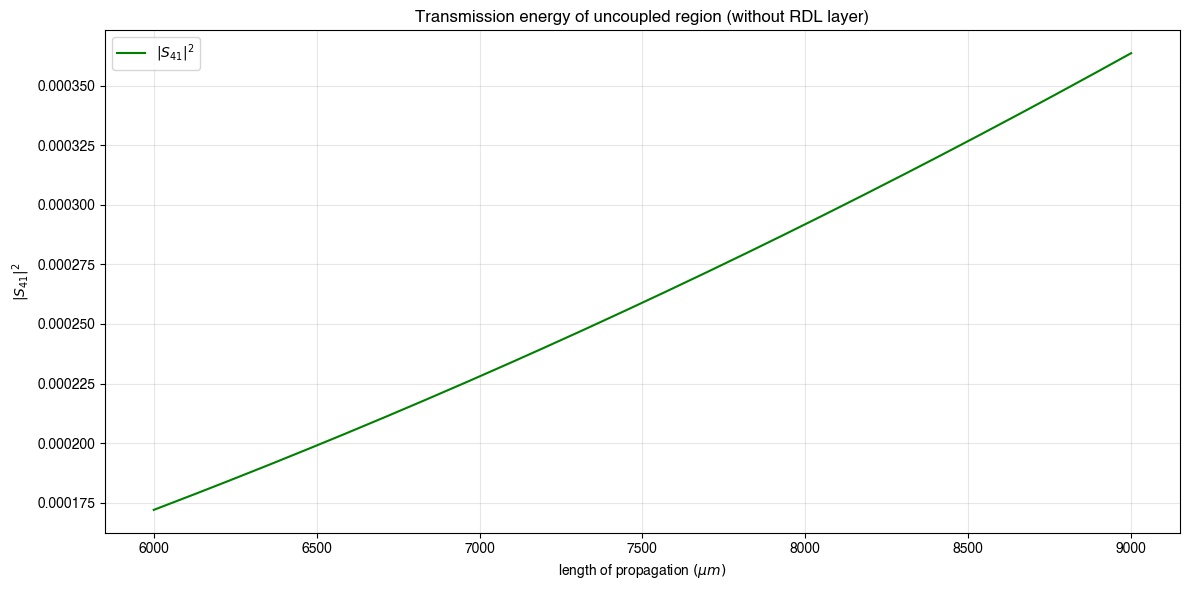

In [29]:
colors_list = ['green','mediumblue','LightPink','crimson','lightskyblue','steelblue','black']*2
param_dict = {  "Y_legends"     : [r'$|S_{41}|^2$'],
                "X_label"       : r"length of propagation $(\mu m)$",
                "Y_label"       : r"$|S_{41}|^2$",
                "title"         : r"Transmission energy of uncoupled region (without RDL layer)",
                "figsize"       : (12,6),
                "marker_list"   : [""]*15,
                "linestyle_list": ["-"]*15,
                "colors_list"   : colors_list,
                # "xticks"        : len_prop_arr_label,
                # "xtickslabel"   : len_prop_arr_label,
                # "yticks"        : yticks,
                # "xlim"          : (-Max_M_idx*M,(Max_M_idx)*M+1),
                # "ylim"          : (-2500,3000),
                # "AD_region_color"    : True,
                # "bbox_legend"   : (0.9,0.9),
                # "text"          : text,
                # "linespacing"   : 1.5,
                # "loc_text"      : (0.6,0.1)}
}

Plot_curve((data_list,),**param_dict)